# Prediccion de financiamiento del sector privado en México - SARIMA

## Librerias

In [60]:
#pip install pmdarima

In [61]:
import pandas as pd
from pmdarima import auto_arima

## Data

In [62]:
df = pd.read_csv("C:/Users/juanj/Workspace/business_Intelligence/PRONOSTICO-JERARQUICO/FSPATC.csv",
            index_col="Fecha",
            parse_dates=True,
            skiprows=8)
df.head()

,SF17926,SF17927,SF46380,SF46381,SF17929,SF17930,SF46382,SF46383,SF17932,SF17933,SF46384,SF46385,SF46386,SF
Fecha,,,,,,,,,,,,,,
1996-10-01,41828.0,36373.4,1407.3,4047.3,304706.2,215689.6,1357.9,87658.8,1103253.3,589846.8,53123.8,193070.2,267212.5,1449787.5
1997-01-01,41515.9,33522.7,2852.6,5140.6,329182.3,237084.6,2731.9,89365.9,1119695.0,617126.9,36780.0,185345.2,280442.8,1490393.2
1997-04-01,41405.0,33111.0,3235.2,5058.8,337529.2,241438.8,3514.2,92576.2,1161120.6,615381.3,36939.7,203997.2,304802.5,1540054.8
1997-07-01,43660.9,34972.5,3773.4,4915.0,338939.1,240081.8,4538.9,94318.4,1118490.1,592079.0,35841.7,185087.5,305481.7,1501090.1
1997-10-01,46330.2,35470.2,4567.3,6292.7,343624.6,240742.9,5607.1,97274.6,1175248.7,608626.9,39324.0,210084.2,317213.5,1565203.5


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 1996-10-01 to 2023-04-01
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SF17926  107 non-null    float64
 1   SF17927  107 non-null    float64
 2   SF46380  107 non-null    float64
 3   SF46381  107 non-null    float64
 4   SF17929  107 non-null    float64
 5   SF17930  107 non-null    float64
 6   SF46382  107 non-null    float64
 7   SF46383  107 non-null    float64
 8   SF17932  107 non-null    float64
 9   SF17933  107 non-null    float64
 10  SF46384  107 non-null    float64
 11  SF46385  107 non-null    float64
 12  SF46386  107 non-null    float64
 13  SF       107 non-null    float64
dtypes: float64(14)
memory usage: 12.5 KB


## Entrenamiento

In [64]:
#training = df.iloc[:-14,:]
#test = df.iloc[-30:,:]

## Modelo SARIMA

In [65]:
#model =auto_arima(y = training.SF,seasonal=True, m = 12)

In [66]:
training = df.iloc[:-14,:]
test = df.iloc[-14:,:]
model =auto_arima(y = training.SF,seasonal=True, m = 12)
#prediccion
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index

In [67]:
print(predictions, model)

Fecha
2020-01-01    1.298950e+07
2020-04-01    1.317823e+07
2020-07-01    1.341512e+07
2020-10-01    1.367973e+07
2021-01-01    1.383087e+07
2021-04-01    1.409392e+07
2021-07-01    1.425397e+07
2021-10-01    1.448920e+07
2022-01-01    1.478510e+07
2022-04-01    1.499490e+07
2022-07-01    1.517457e+07
2022-10-01    1.537402e+07
2023-01-01    1.558142e+07
2023-04-01    1.579246e+07
dtype: float64  ARIMA(0,2,1)(1,0,0)[12]          


In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   93
Model:             SARIMAX(0, 2, 1)x(1, 0, [], 12)   Log Likelihood               -1235.347
Date:                             Thu, 02 Nov 2023   AIC                           2476.694
Time:                                     14:42:51   BIC                           2484.227
Sample:                                 10-01-1996   HQIC                          2479.733
                                      - 10-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9091      0.052    -17.585      0.000      -1.010      -0.808
ar.S.L12       0.1469      0.087      1.695      0.090      -0.023       0.317
sigma2      3.571e+10   3.15e-13   1.13e+23      0.000    3.57e+10    3.57e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.54   Prob(JB):                         0.69
Heteroskedasticity (H):               2.35   Skew:                             0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<Axes: xlabel='Fecha'>

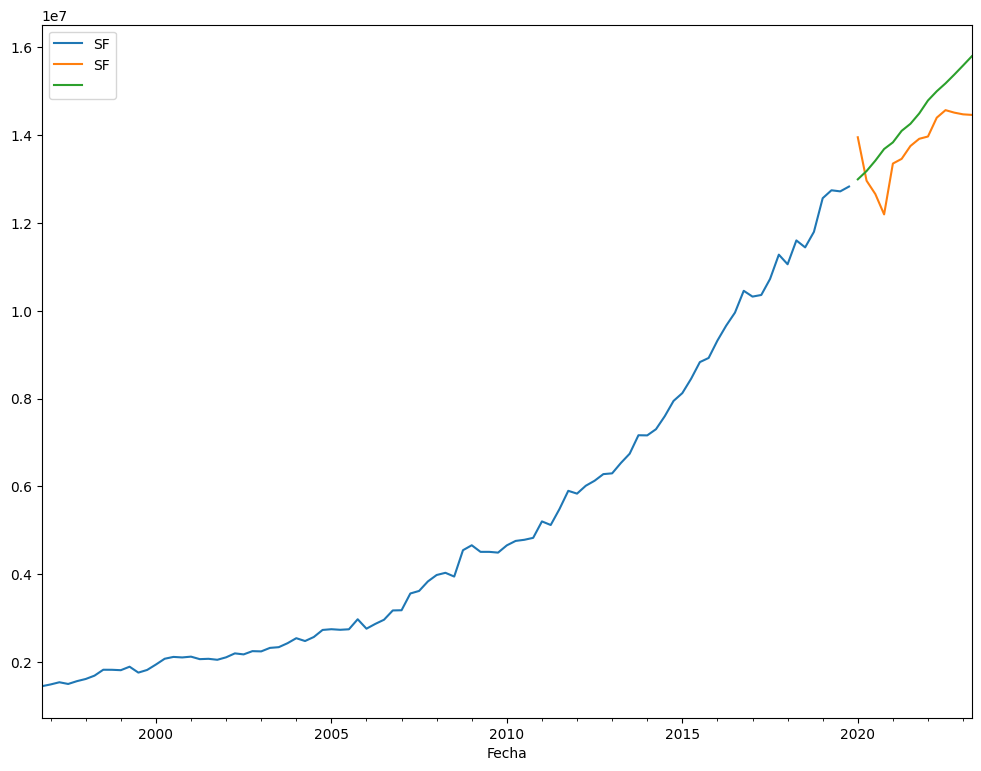

In [69]:
# visualization
training['SF'].plot(figsize=(12,9), legend=True)
test['SF'].plot( legend=True)
predictions.plot(legend=True)

## PRONOSTICO DE JERARQUIA

In [70]:
import numpy as np

In [71]:
# generando matrix S 10 x 14

S =  np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0 ,0],
    [0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0],
    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1],
])
S1 = np.linalg.inv(np.dot(S.T,S))
S2 = np.dot(S,S1)
S3 = np.dot(S2,S.T)

# 30 primeras predicciones sarima
Y = np.array(predictions)

# multiplicacion de matriz de jerarquia y modelo sarima
Yn = np.dot(S3,Y)
Yn


array([28715496.43172003,  8633868.04807952,  9334145.72863467,
       10747482.65500582,  2649238.31848956,  2912292.97138796,
        3072336.75820201,  2844183.459659  ,  3140081.53998819,
        3349880.72898748,  2380824.75721163,  2580273.84892459,
        2787672.43437326,  2998711.61449634])

In [72]:
print(S3)


[[ 0.6969697   0.22727273  0.22727273  0.24242424  0.07575758  0.07575758
   0.07575758  0.07575758  0.07575758  0.07575758  0.06060606  0.06060606
   0.06060606  0.06060606]
 [ 0.22727273  0.57954545 -0.17045455 -0.18181818  0.19318182  0.19318182
   0.19318182 -0.05681818 -0.05681818 -0.05681818 -0.04545455 -0.04545455
  -0.04545455 -0.04545455]
 [ 0.22727273 -0.17045455  0.57954545 -0.18181818 -0.05681818 -0.05681818
  -0.05681818  0.19318182  0.19318182  0.19318182 -0.04545455 -0.04545455
  -0.04545455 -0.04545455]
 [ 0.24242424 -0.18181818 -0.18181818  0.60606061 -0.06060606 -0.06060606
  -0.06060606 -0.06060606 -0.06060606 -0.06060606  0.15151515  0.15151515
   0.15151515  0.15151515]
 [ 0.07575758  0.19318182 -0.05681818 -0.06060606  0.73106061 -0.26893939
  -0.26893939 -0.01893939 -0.01893939 -0.01893939 -0.01515152 -0.01515152
  -0.01515152 -0.01515152]
 [ 0.07575758  0.19318182 -0.05681818 -0.06060606 -0.26893939  0.73106061
  -0.26893939 -0.01893939 -0.01893939 -0.01893939 -

In [73]:
df2 = pd.read_csv("C:/Users/juanj/Workspace/business_Intelligence/PRONOSTICO-JERARQUICO/FSPATC.csv",
            skiprows=8)
fecha = df2['Fecha']
fff=fecha[-14:]
fff = pd.DataFrame(fff)
fff = fff['Fecha'].tail(14)
fff.reset_index(drop=True, inplace=True)
fff= pd.DataFrame(fff)

In [74]:
NYn = pd.DataFrame(Yn)
NYn['fecha'] = fff['Fecha']
NYn

,0,fecha
0,2.871550e+07,1/1/2020
1,8.633868e+06,4/1/2020
2,9.334146e+06,7/1/2020
3,1.074748e+07,10/1/2020
4,2.649238e+06,1/1/2021
5,2.912293e+06,4/1/2021
6,3.072337e+06,7/1/2021
7,2.844183e+06,10/1/2021
8,3.140082e+06,1/1/2022
9,3.349881e+06,4/1/2022


In [75]:
NYn.set_index('fecha', inplace=True)
NYn

,0
fecha,
1/1/2020,2.871550e+07
4/1/2020,8.633868e+06
7/1/2020,9.334146e+06
10/1/2020,1.074748e+07
1/1/2021,2.649238e+06
4/1/2021,2.912293e+06
7/1/2021,3.072337e+06
10/1/2021,2.844183e+06
1/1/2022,3.140082e+06


<Axes: xlabel='fecha'>

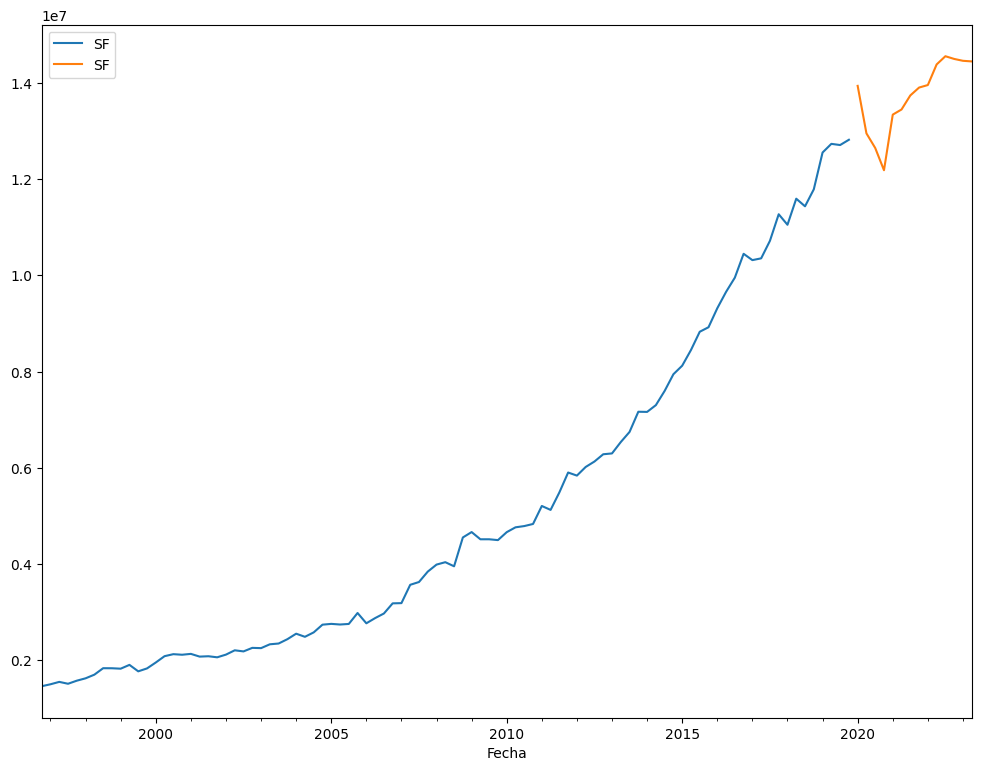

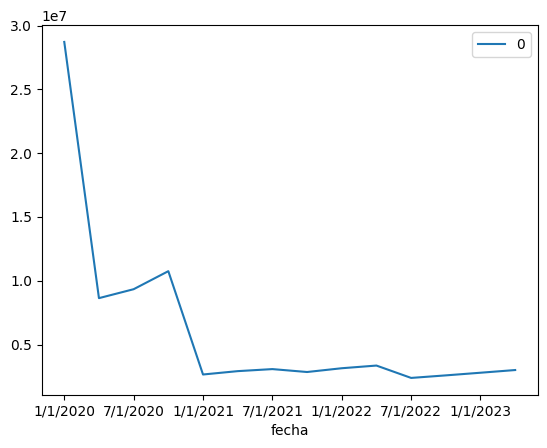

In [76]:
# visualization
training['SF'].plot(figsize=(12,9), legend=True)
test['SF'].plot( legend=True)
NYn.plot(legend=True)

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#copiado y archivo temporal
import shutil
import tempfile
# librerias para pronostico series de tiempo 
#empleando metodologia SARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#se buscara realizar un modelo de pronostico de posibles clientes o 
#poblacion objetivo dentro de la zona de estudio definida como San
# Nicolas de los Garza en el estado de Nuevo Leon 

#generamos un aerchivo temporal donde se realizara una copia de los
# datos que usaremos para trabajas, de nomodo que no los corrompamos

# Ruta del archivo original
archivo_original = 'C:/Users/juanj/Workspace/business_Intelligence/PROYECTO FINAL/poblacion_edades_nuevo_leon_claves_manzana.csv'

# Crear un archivo temporal
temp = tempfile.NamedTemporaryFile(delete=False)

# Copiar el contenido del archivo original al archivo temporal
shutil.copyfile(archivo_original, temp.name)

# Ahora puedes trabajar con 'temp.name' que es la ruta al archivo temporal
#Ruta de archivos
# Leemos el archivo csv
datos = pd.read_csv(temp.name)
#print(datos)

resultado = datos.loc[datos['Clave_de_municipio'] == '1']

print(resultado)


ValueError: Invalid file path or buffer object type: <class 'list'>